In [1]:
from xgboost import plot_tree
import xgboost as xgb

In [4]:
MODEL_PATH = '/home/anhphantq/xgboost'
TEST_MODEL_PATH = '/home/anhphantq/xgboost_test'
MODEL_VERSION = '14'
TEST_MODEL_VERSION = '8'



In [5]:
import xgboost as xgb
click_models = []
for fold in range(3):
  click_model = xgb.Booster()
  click_model.load_model(MODEL_PATH + '/clicks_only_' + MODEL_VERSION + f'/XGB_fold{fold}.xgb')
  click_models.append(click_model)

cart_models = []
for fold in range(3):
  cart_model = xgb.Booster()
  cart_model.load_model(MODEL_PATH + '/carts_only_'+ MODEL_VERSION + f'/XGB_fold{fold}.xgb')
  cart_models.append(cart_model)

order_models = []
for fold in range(3):
  order_model = xgb.Booster()
  order_model.load_model(MODEL_PATH + '/orders_only_'+ MODEL_VERSION + f'/XGB_fold{fold}.xgb')
  order_models.append(order_model)

In [6]:
from xgb_utils import columns, test_columns

In [6]:
model = click_model
model.feature_names = columns[3:]

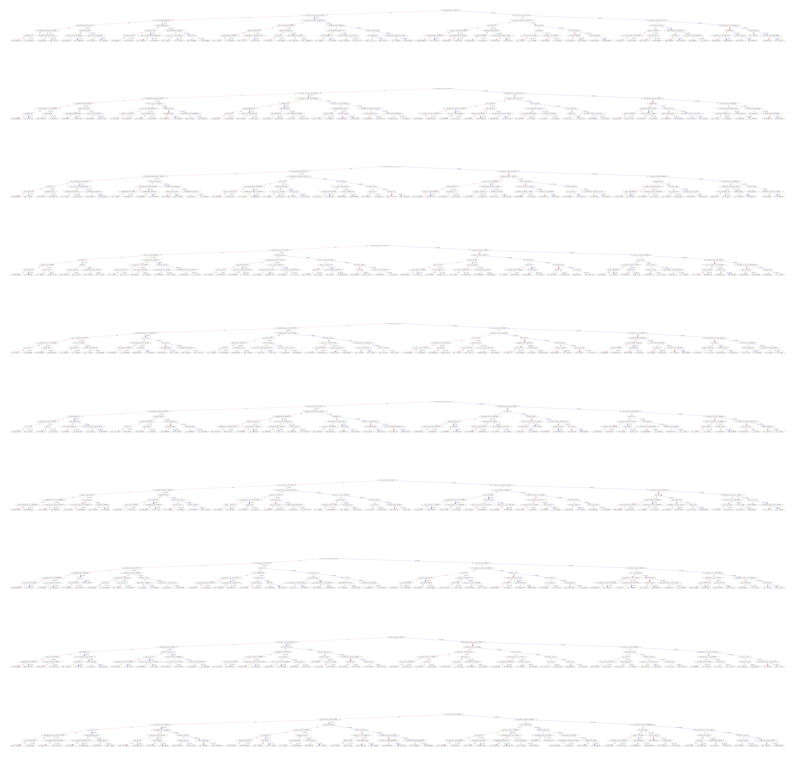

In [15]:
# click_model.feature_names = columns
import matplotlib.pyplot as plt
ntree = 10

fig, axs = plt.subplots(10,1, figsize = (100 / ntree, 10))
for i in range(ntree):
    plot_tree(model, fontsize = 10, num_trees= i, ax = axs if ntree == 1 else axs[i])
plt.savefig('tree_high_dpi', dpi=160 * ntree)

In [7]:
import xgboost as xgb
test_click_models = []
for fold in range(3):
  test_click_model = xgb.Booster()
  test_click_model.load_model(TEST_MODEL_PATH + '/clicks_only_' + TEST_MODEL_VERSION + f'/XGB_fold{fold}.xgb')
  test_click_models.append(test_click_model)

test_cart_models = []
for fold in range(3):
  test_cart_model = xgb.Booster()
  test_cart_model.load_model(TEST_MODEL_PATH + '/carts_only_'+ TEST_MODEL_VERSION + f'/XGB_fold{fold}.xgb')
  test_cart_models.append(test_cart_model)

test_order_models = []
for fold in range(3):
  test_order_model = xgb.Booster()
  test_order_model.load_model(TEST_MODEL_PATH + '/orders_only_'+ TEST_MODEL_VERSION + f'/XGB_fold{fold}.xgb')
  test_order_models.append(test_order_model)

In [8]:
model = test_order_model
model.feature_names = test_columns[2:]

In [ ]:
# click_model.feature_names = columns
import matplotlib.pyplot as plt


fig, axs = plt.subplots(10,1, figsize = (30, 10))
for i in range(10):
    plot_tree(model, fontsize = 10, num_trees= i, ax = axs[i])
plt.savefig('tree_high_dpi', dpi=1600)

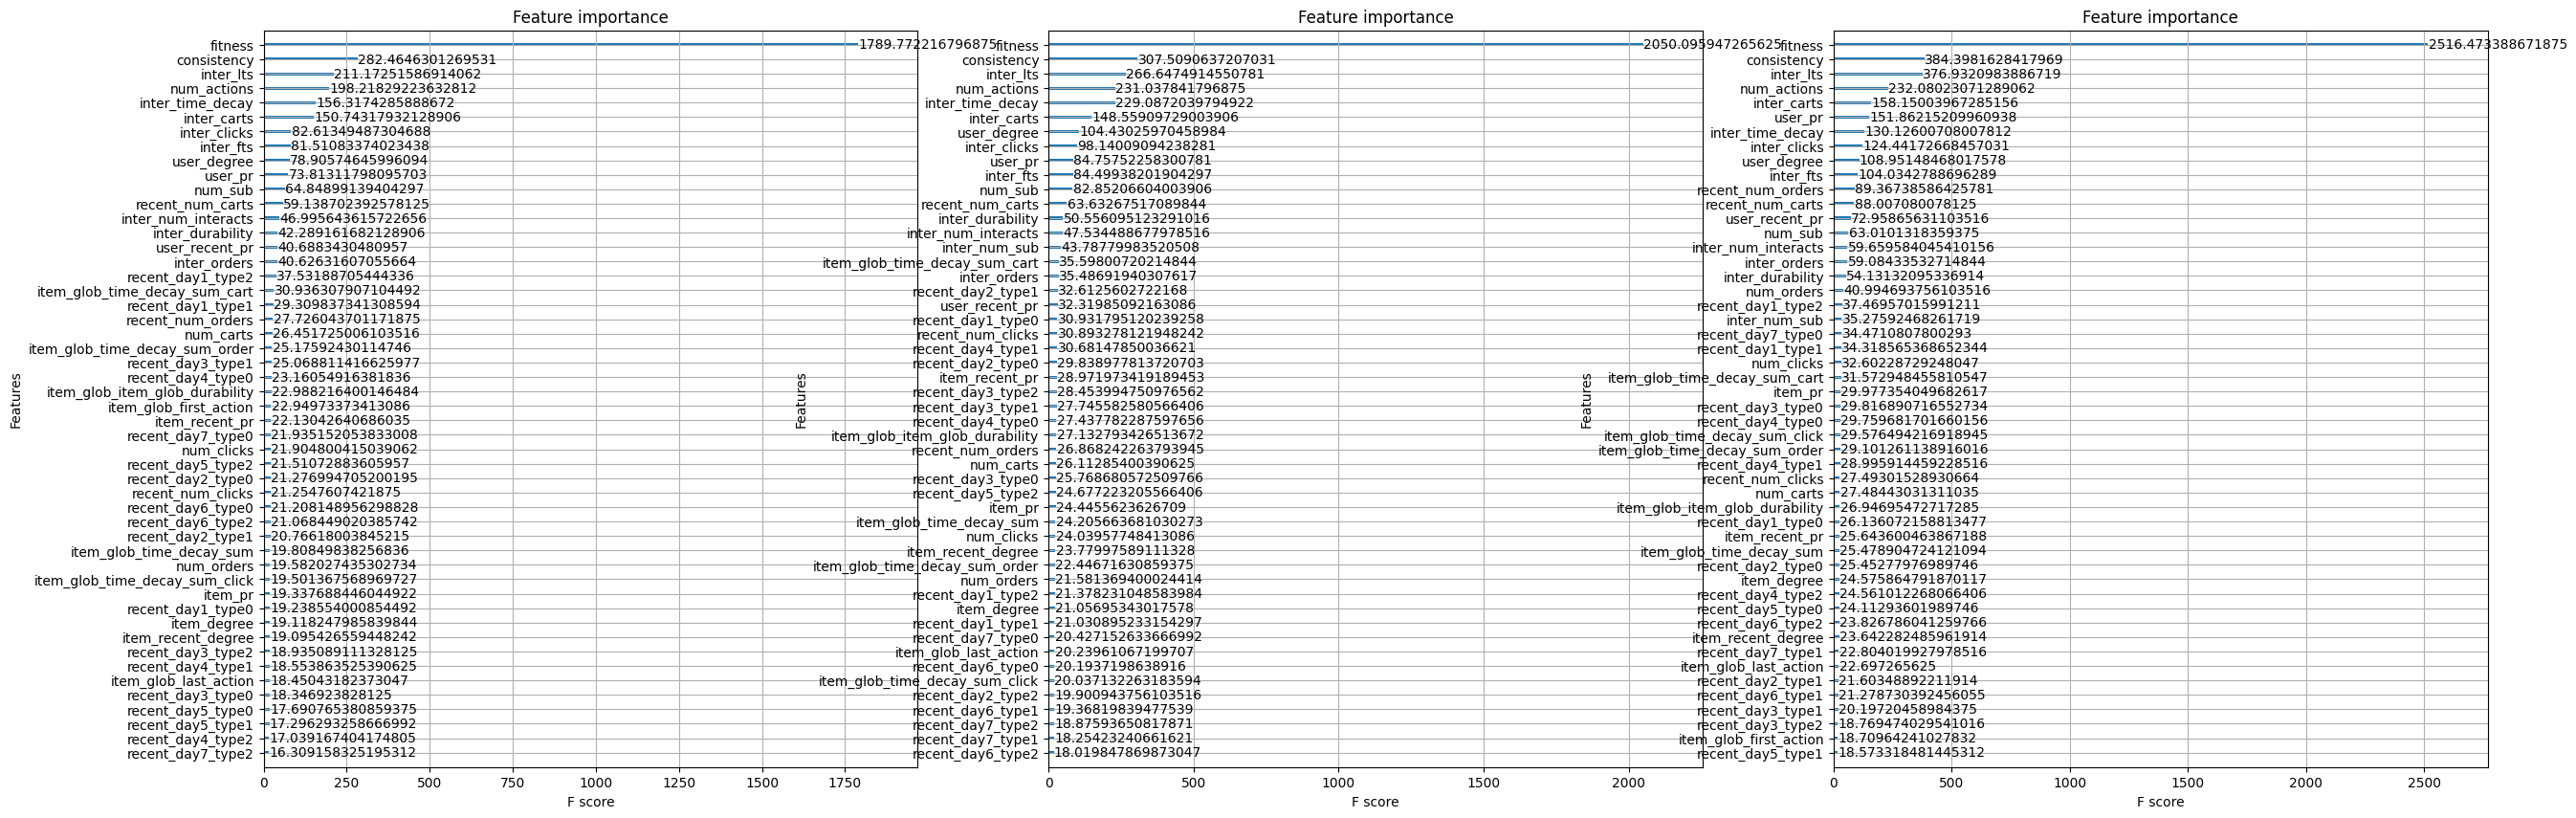

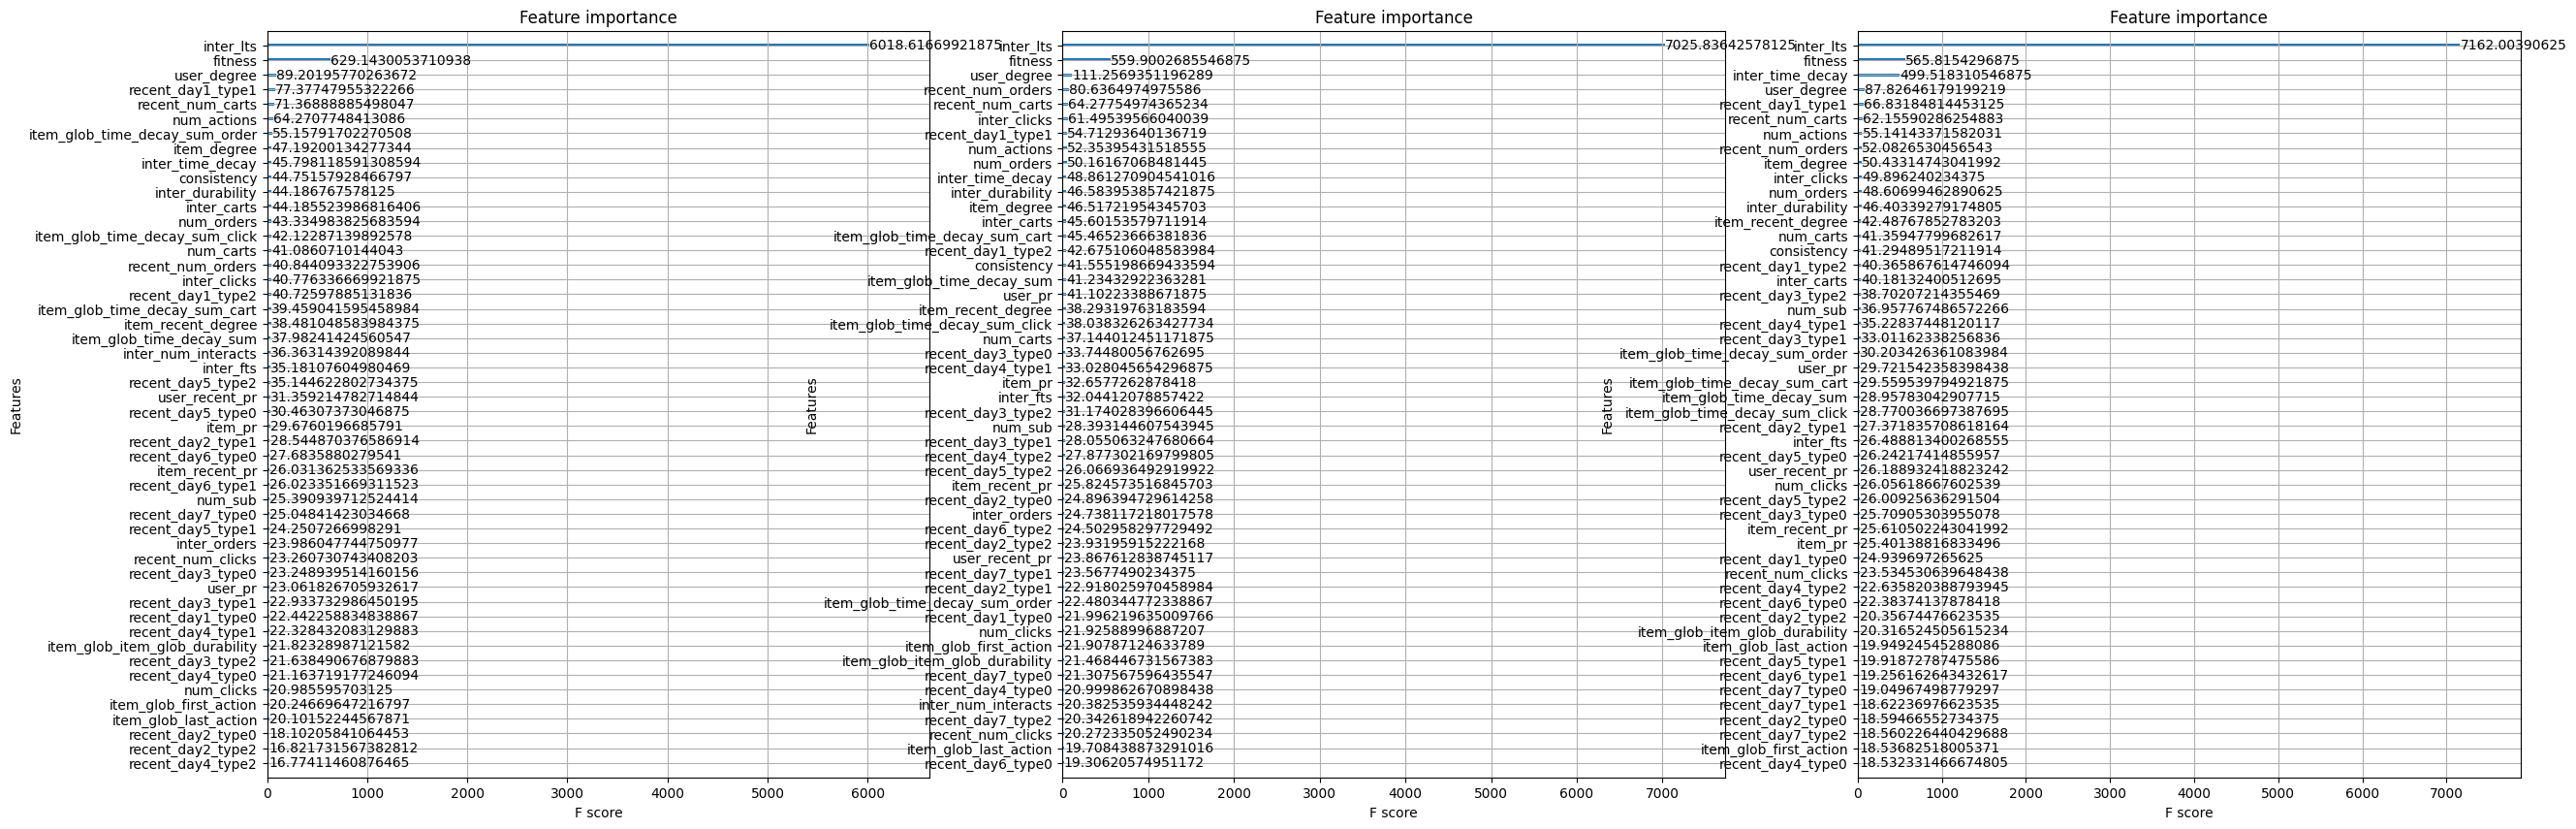

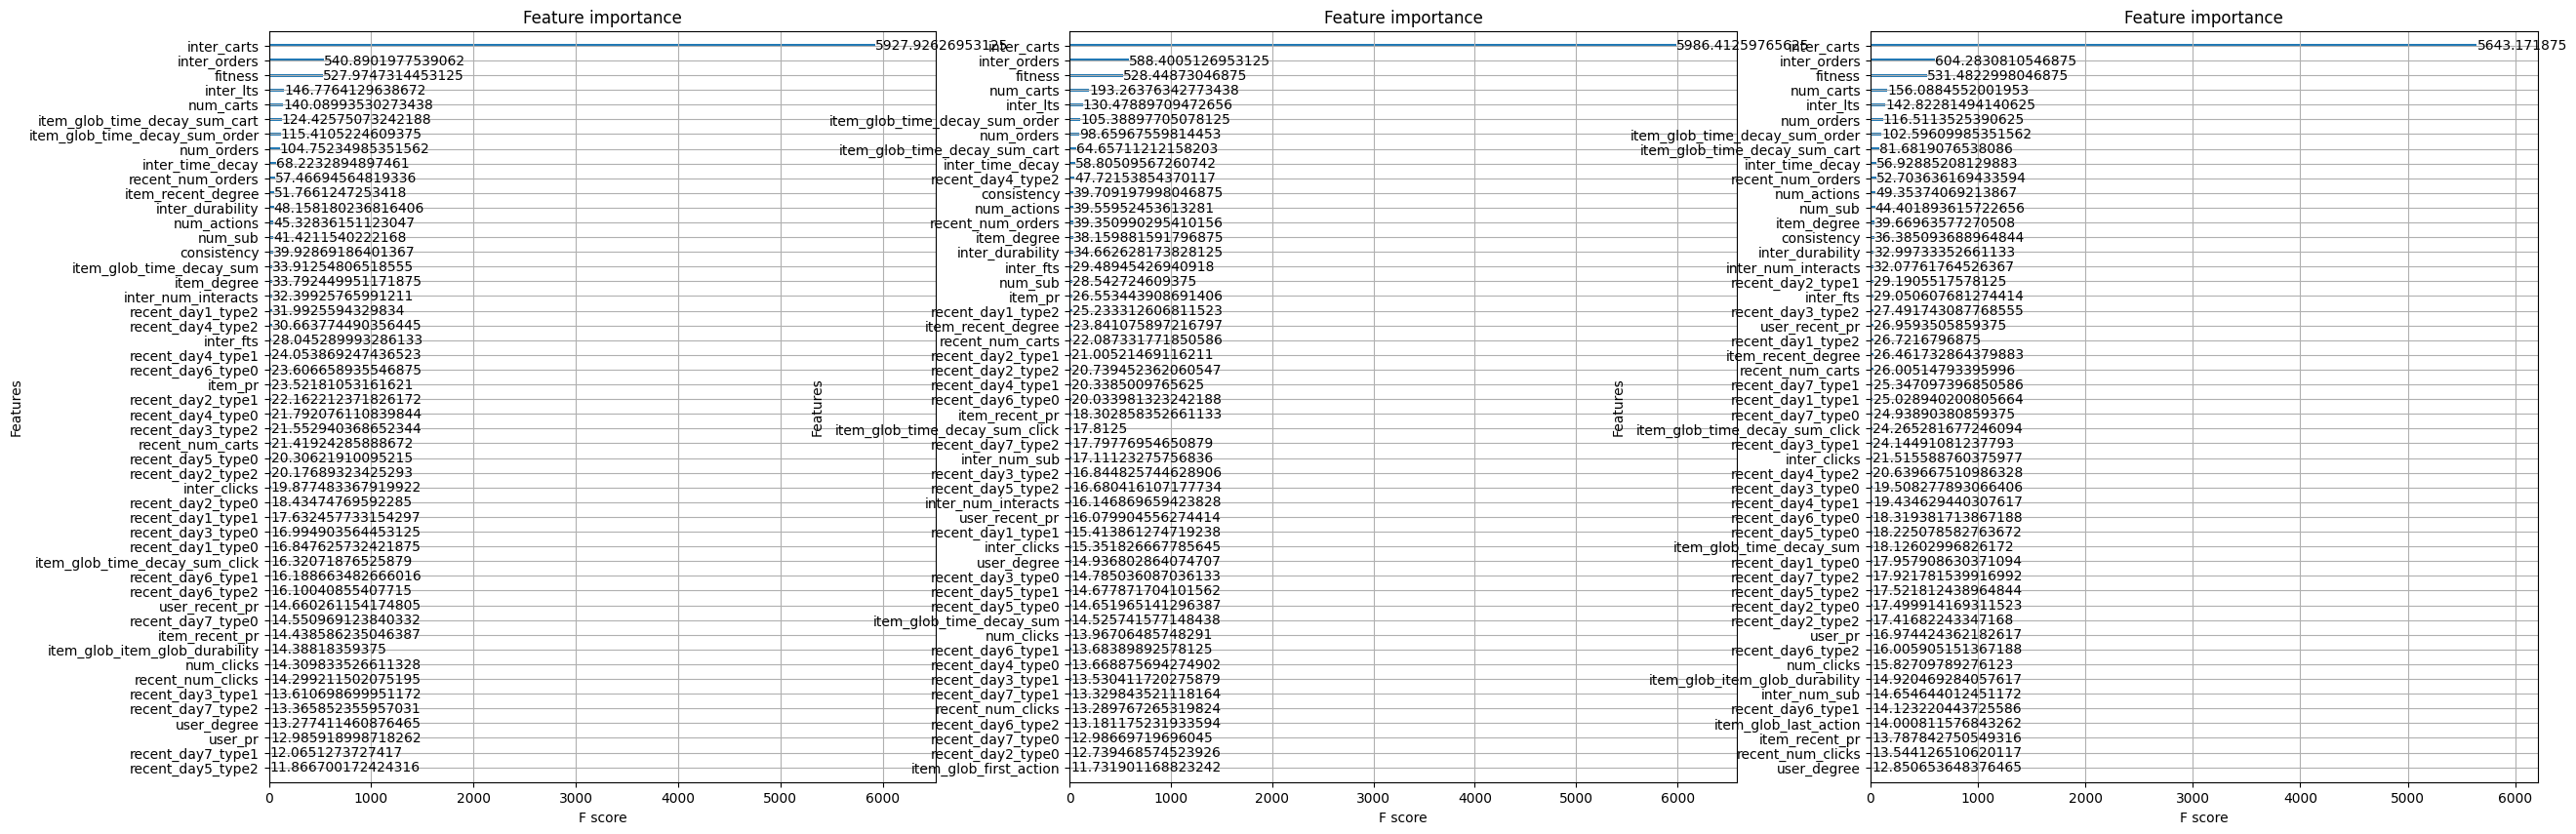

In [13]:
for m in [test_click_models, test_cart_models, test_order_models]:
    fig, axs = plt.subplots(1, 3, figsize = (30, 10))
    for i in range(3):
        m[i].feature_names = test_columns[2:]
        xgb.plot_importance(m[i], ax = axs[i], max_num_features= 50, importance_type= 'gain')